<a href="https://colab.research.google.com/github/contreras-juan/UPTC_Diplomado_Ciencia_de_Datos/blob/main/metodos_supervisados/Regresión_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<img src="https://storage.googleapis.com/adonaivera_certified/banner.png">
    
##  Diplomado en Ciencia de Datos - Cohorte 2024

Author: [Juan Felipe Contreras](https://www.linkedin.com/in/juanf-contreras/)

<h1 align='center'> Regresión Lineal </h1>

<h2> Introducción </h2>

Una de las técnicas más utilizadas en estadística para intentar predecir o explicar una variable numérica continua es la **regresión lineal**. El término "regresión" fue acuñado por sir Francis Galton (primo de Charles Darwin), quién utilizó esta técnica para explorar la relación entre la altura de padres e hijos. Esta es una técnica fundamental en el campo de la ciencia de datos, se presenta como un poderoso instrumento analítico que permite modelar y comprender las relaciones lineales entre variables. En el de la ciencia de datos, la Regresión Lineal emerge como una herramienta crucial para la predicción, la inferencia estadística y la explicación de fenómenos estadísticos. Este método se basa en la suposición de una relación lineal entre una variable dependiente y una o más variables independientes, buscando identificar el mejor ajuste lineal posible.

<h2> Regresión lineal simple </h2>

La forma en que representamos el modelo de regresión lineal es como una función lineal. Sea $y$ una variable que queremos explicar por medio de la variable $x$, entonces podemos expresar a $y$ como una función de $x$:

$$y = f(x) = \alpha + \beta x + \epsilon$$

donde $\epsilon$ es una variable aleatoria que representa la diferencia entre $y$, y su predicción $\hat{y}$. Dicho de otra manera:

$$\hat{y} = \alpha + \beta x$$

Así,

$$\epsilon = y - \hat{y} = y - (\alpha + \beta x)$$

In [7]:
import numpy as np
import matplotlib.pyplot as plt

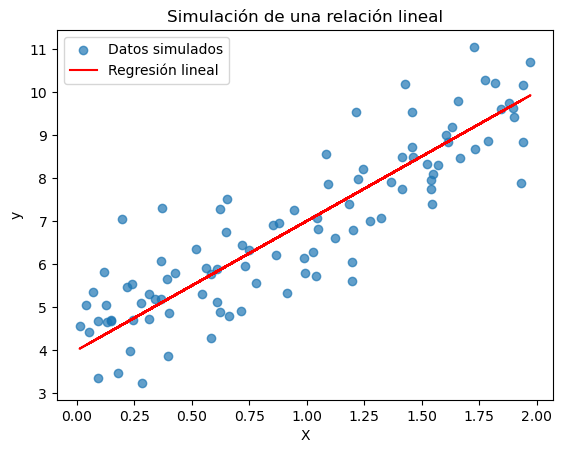

In [11]:
# Simular datos aleatorios
np.random.seed(42)  # Generar semilla
X = 2 * np.random.rand(100, 1)  # Variable independiente
y = 4 + 3 * X + np.random.randn(100, 1)  # Relación lineal con ruido

# Plot the simulated data
plt.scatter(X, y, alpha=0.7, label='Datos simulados')
plt.plot(X, 4 + 3 * X, color='red', label='Regresión lineal')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simulación de una relación lineal')
plt.legend()
plt.show()

Una de las preguntas principales es cómo podemos encontrar $\alpha$ y $\beta$ en la ecuación anterior; para esto definimos la ecuación de pérdida